In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


print("Num GPUS avadible:",len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUS avadible: 1


In [2]:
classes = ['0', '1', '2', '3', '4']

base_dir=os.path.join( 'prop')

train_dir = os.path.join(base_dir, 'train5k_5cat')
test_dir = os.path.join( base_dir,'test1k_5cat')


In [3]:

val_dir = test_dir

train_0 = os.path.join(train_dir, '0') 
train_1 = os.path.join(train_dir, '1')
train_2 = os.path.join(train_dir, '2') 
train_3 = os.path.join(train_dir, '3')  
train_4 = os.path.join(train_dir, '4') 

val_0 = os.path.join(val_dir, '0') 
val_1 = os.path.join(val_dir, '1')
val_2 = os.path.join(val_dir, '2') 
val_3 = os.path.join(val_dir, '3')  
val_4 = os.path.join(val_dir, '4')  


#numeros
num_0_tr = len(os.listdir(train_0))
num_1_tr = len(os.listdir(train_1))
num_2_tr = len(os.listdir(train_2))
num_3_tr = len(os.listdir(train_3))
num_4_tr = len(os.listdir(train_4))


num_0_v = len(os.listdir(val_0))
num_1_v = len(os.listdir(val_1))
num_2_v = len(os.listdir(val_2))
num_3_v = len(os.listdir(val_3))
num_4_v = len(os.listdir(val_4))


total_train = num_0_tr + num_1_tr + num_2_tr + num_3_tr + num_4_tr
total_val = num_0_v + num_1_v + num_2_v + num_3_v + num_4_v
 

In [4]:
#augmentación para set de entrenamiento 
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      fill_mode='nearest' )

train_data_gen = image_gen_train.flow_from_directory(batch_size=32,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(299,299),
                                                     class_mode='binary')

Found 2030 images belonging to 5 classes.


In [5]:
image_gen_test = ImageDataGenerator(
    rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=32,
                                                 directory=val_dir,
                                                 target_size=(299,299),
                                                 class_mode='binary')

Found 447 images belonging to 5 classes.


In [6]:

with tf.device('/GPU:0'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(299, 299, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5,activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       1

In [7]:
with tf.device('/GPU:0'):
    epochs=200
    history = model.fit(
        train_data_gen,
        steps_per_epoch=int(np.ceil(total_train / float(32))),
        epochs=epochs,
        validation_data=test_data_gen,
        validation_steps=int(np.ceil(total_val / float(32)))
    )

Train for 64 steps, validate for 14 steps
Epoch 1/200
64/64 [==============================] - 12s 181ms/step - loss: 1.4971 - accuracy: 0.3611 - val_loss: 1.4905 - val_accuracy: 0.2908
Epoch 2/200
64/64 [==============================] - 8s 129ms/step - loss: 1.4729 - accuracy: 0.3975 - val_loss: 1.4680 - val_accuracy: 0.3691
Epoch 3/200
64/64 [==============================] - 8s 128ms/step - loss: 1.4714 - accuracy: 0.3921 - val_loss: 1.4646 - val_accuracy: 0.3579
Epoch 4/200
64/64 [==============================] - 8s 128ms/step - loss: 1.4638 - accuracy: 0.4128 - val_loss: 1.4619 - val_accuracy: 0.3870
Epoch 5/200
64/64 [==============================] - 8s 129ms/step - loss: 1.4606 - accuracy: 0.4207 - val_loss: 1.5318 - val_accuracy: 0.3535
Epoch 6/200
64/64 [==============================] - 8s 128ms/step - loss: 1.4638 - accuracy: 0.4153 - val_loss: 1.4860 - val_accuracy: 0.3669
Epoch 7/200
64/64 [==============================] - 8s 129ms/step - loss: 1.4518 - accuracy: 0.427

64/64 [==============================] - 8s 130ms/step - loss: 1.2898 - accuracy: 0.6148 - val_loss: 1.4686 - val_accuracy: 0.4251
Epoch 58/200
64/64 [==============================] - 8s 129ms/step - loss: 1.2884 - accuracy: 0.6163 - val_loss: 1.4559 - val_accuracy: 0.4541
Epoch 59/200
64/64 [==============================] - 8s 129ms/step - loss: 1.2699 - accuracy: 0.6320 - val_loss: 1.4350 - val_accuracy: 0.4676
Epoch 60/200
64/64 [==============================] - 8s 129ms/step - loss: 1.2619 - accuracy: 0.6424 - val_loss: 1.4571 - val_accuracy: 0.4452
Epoch 61/200
64/64 [==============================] - 8s 129ms/step - loss: 1.2564 - accuracy: 0.6488 - val_loss: 1.4636 - val_accuracy: 0.4430
Epoch 62/200
64/64 [==============================] - 8s 129ms/step - loss: 1.2571 - accuracy: 0.6448 - val_loss: 1.4780 - val_accuracy: 0.4139
Epoch 63/200
64/64 [==============================] - 8s 129ms/step - loss: 1.2436 - accuracy: 0.6635 - val_loss: 1.4548 - val_accuracy: 0.4474
Epoch

Epoch 114/200
64/64 [==============================] - 8s 130ms/step - loss: 1.1118 - accuracy: 0.7926 - val_loss: 1.4916 - val_accuracy: 0.4094
Epoch 115/200
64/64 [==============================] - 8s 129ms/step - loss: 1.1199 - accuracy: 0.7857 - val_loss: 1.4819 - val_accuracy: 0.4251
Epoch 116/200
64/64 [==============================] - 8s 129ms/step - loss: 1.1100 - accuracy: 0.7946 - val_loss: 1.5035 - val_accuracy: 0.3960
Epoch 117/200
64/64 [==============================] - 8s 129ms/step - loss: 1.1042 - accuracy: 0.8015 - val_loss: 1.4993 - val_accuracy: 0.4049
Epoch 118/200
64/64 [==============================] - 8s 129ms/step - loss: 1.1096 - accuracy: 0.7956 - val_loss: 1.4757 - val_accuracy: 0.4228
Epoch 119/200
64/64 [==============================] - 8s 129ms/step - loss: 1.1261 - accuracy: 0.7798 - val_loss: 1.4865 - val_accuracy: 0.4072
Epoch 120/200
64/64 [==============================] - 8s 129ms/step - loss: 1.1305 - accuracy: 0.7714 - val_loss: 1.4720 - val_ac

64/64 [==============================] - 8s 129ms/step - loss: 1.0459 - accuracy: 0.8601 - val_loss: 1.5056 - val_accuracy: 0.3982
Epoch 171/200
64/64 [==============================] - 8s 129ms/step - loss: 1.0485 - accuracy: 0.8586 - val_loss: 1.5174 - val_accuracy: 0.3781
Epoch 172/200
64/64 [==============================] - 8s 129ms/step - loss: 1.0430 - accuracy: 0.8626 - val_loss: 1.4661 - val_accuracy: 0.4385
Epoch 173/200
64/64 [==============================] - 8s 129ms/step - loss: 1.0390 - accuracy: 0.8660 - val_loss: 1.4590 - val_accuracy: 0.4385
Epoch 174/200
64/64 [==============================] - 8s 129ms/step - loss: 1.0397 - accuracy: 0.8655 - val_loss: 1.4892 - val_accuracy: 0.4094
Epoch 175/200
64/64 [==============================] - 8s 129ms/step - loss: 1.0396 - accuracy: 0.8665 - val_loss: 1.4672 - val_accuracy: 0.4251
Epoch 176/200
64/64 [==============================] - 8s 129ms/step - loss: 1.0401 - accuracy: 0.8655 - val_loss: 1.4879 - val_accuracy: 0.4116

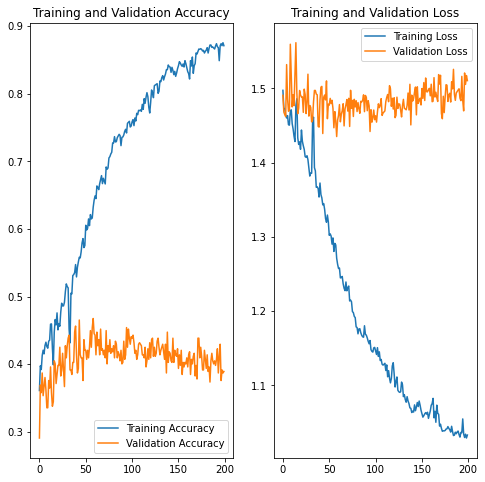

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Guardar el Modelo
model.save('miniprueba2.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
#new_model = tf.keras.models.load_model('miniprueba2.h5')